In [1]:
import os
import json
from typing import Dict, List, Optional, Union, cast
import requests

from env import github_token, github_username

import acquire_zach as az
import wrangle as w

import numpy as np
import pandas as pd

# acquire
from requests import get
from bs4 import BeautifulSoup
from time import sleep
import os

# prepare
import unicodedata
import re
import json
import nltk
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.corpus import stopwords

# explore
from sklearn.model_selection import train_test_split
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# model
from pprint import pprint
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

# Acquire

In [2]:
df = pd.read_csv('google_readmes1020.csv').drop(columns="Unnamed: 0")

In [3]:
df.head(2)

,repo,language,readme_contents
0,google/ci_edit,Python,# What is ci_edit\n\nci_edit is a text editor....
1,google/bms-toolkit,Shell,# bms-toolkit\n\nToolkit for installing and cr...


# Explore

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   repo             1020 non-null   object
 1   language         983 non-null    object
 2   readme_contents  1005 non-null   object
dtypes: object(3)
memory usage: 24.0+ KB


In [11]:
df.isnull().sum()

repo                0
language           37
readme_contents    15
dtype: int64

In [12]:
df[df.language.isnull()]

,repo,language,readme_contents
15,google/transit,NaN,The repository contains specification to manip...
22,google/overcoming-conflicting-data,NaN,# Conflicting Data for Model Updates\n\nThis r...
46,google/deepdream,NaN,# deepdream\n\nThis repository contains IPytho...
56,google/skywater-pdk-libs-sky130_fd_pr,NaN,:lib:`sky130_fd_pr` - SKY130 Primitive Models ...
67,google/proto-quic,NaN,proto-quic is deprecated\n====================...
72,google/CTAP2-test-tool-corpus,NaN,"# <img alt=""Test Tool logo"" src=""docs/img/logo..."
101,google/healthcare-text-annotation,NaN,# Healthcare Text Annotation Guidelines\n\nMed...
153,google/or-models,NaN,# OR-Models\n\nThis repository contains a mode...
191,google/mlir-npcomp,NaN,# mlir-npcomp\n\nThis project has moved to the...
222,google/oss-vulnerability-guide,NaN,# Guide to coordinated vulnerability disclosur...


In [13]:
df[df.readme_contents.isnull()]

,repo,language,readme_contents
32,google/aistplusplus_dataset,JavaScript,NaN
138,google/google.github.io,HTML,NaN
154,google/file.dart,Dart,NaN
277,google/.github,NaN,NaN
378,google/certificate-transparency-rfcs,Python,NaN
413,google/aichoreographer,HTML,NaN
425,google/look-before-you-speak,HTML,NaN
470,google/jsontoken,Java,NaN
587,google/coursebuilder-core,Python,NaN
591,google/prochlo,C++,NaN


In [16]:
df.dropna(inplace=True)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 969 entries, 0 to 1019
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   repo             969 non-null    object
 1   language         969 non-null    object
 2   readme_contents  969 non-null    object
dtypes: object(3)
memory usage: 30.3+ KB


In [19]:
df.isnull().sum()

repo               0
language           0
readme_contents    0
dtype: int64

In [20]:
df.language.value_counts()

Python              195
C++                 152
Go                  121
Java                 92
JavaScript           86
TypeScript           51
Dart                 39
C                    36
Jupyter Notebook     29
HTML                 26
Shell                21
Rust                 21
Kotlin               15
Objective-C          11
Verilog               7
Vim script            7
Haskell               7
Ruby                  6
Swift                 5
C#                    4
CSS                   4
MATLAB                4
Vue                   4
Starlark              4
R                     3
PHP                   3
CMake                 2
Lean                  2
PowerShell            1
HCL                   1
Groovy                1
Assembly              1
Jsonnet               1
PureBasic             1
Common Lisp           1
Crystal               1
TeX                   1
Makefile              1
Roff                  1
Emacs Lisp            1
Name: language, dtype: int64

<AxesSubplot:>

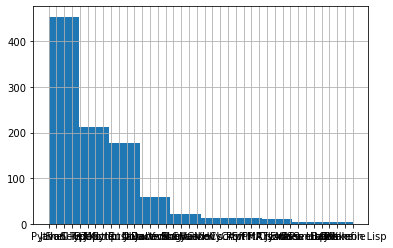

In [21]:
df.language.hist()

[Text(0.5, 1.0, 'Distribution of Google Coding Languages in Github Repos'),
 Text(0.5, 0, 'Number of Repos')]

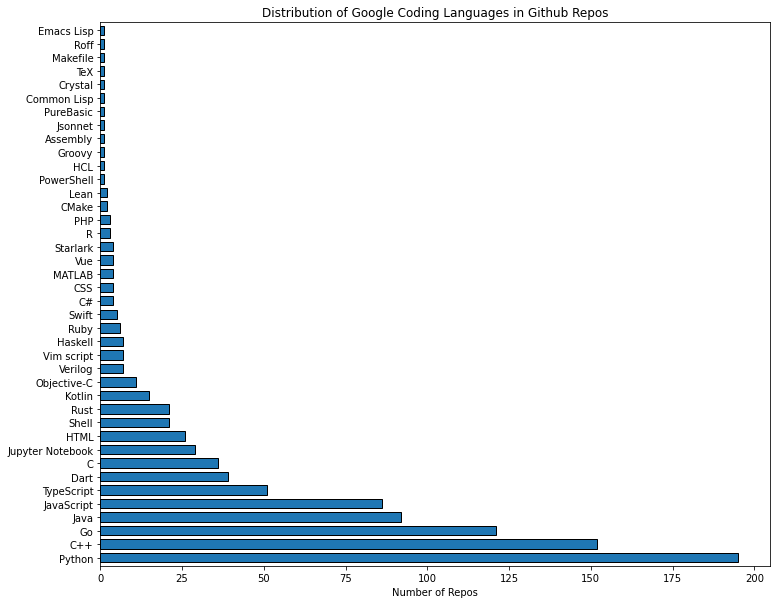

In [26]:
fig = plt.figure(figsize=(12, 10))

ax = df.language.value_counts().plot.barh(width=.7, ec='black')
plt.xticks(rotation=0)
ax.set(title='Distribution of Google Coding Languages in Github Repos', xlabel='Number of Repos')

In [33]:
len(df.readme_contents[0])

8384

In [34]:
length = []
for c in df.readme_contents:
    text_len = len(c)
    length.append(text_len)

length

[8384,
 2872,
 2198,
 4730,
 1869,
 3206,
 5079,
 218,
 2898,
 13752,
 998,
 3997,
 675,
 907,
 727,
 3189,
 4730,
 397,
 926,
 927,
 5090,
 9938,
 1958,
 703,
 2318,
 2933,
 7279,
 18254,
 1704,
 17228,
 2291,
 1949,
 11376,
 3147,
 1257,
 2254,
 2270,
 31458,
 292,
 5263,
 4914,
 4283,
 1513,
 2597,
 1957,
 216,
 16225,
 1421,
 4600,
 22596,
 1765,
 11797,
 12227,
 210,
 19,
 1499,
 9671,
 4078,
 4500,
 1339,
 2736,
 3910,
 6440,
 9670,
 1063,
 1843,
 856,
 4712,
 936,
 1167,
 275,
 8047,
 203,
 4345,
 651,
 2604,
 2180,
 981,
 1760,
 6290,
 2946,
 1963,
 5366,
 2131,
 983,
 4285,
 1031,
 4664,
 2598,
 2381,
 1204,
 43298,
 803,
 5784,
 287,
 5276,
 1173,
 727,
 1443,
 2668,
 16677,
 6431,
 2177,
 5071,
 2611,
 10275,
 2570,
 5839,
 24805,
 1258,
 538,
 932,
 299,
 3012,
 3067,
 2630,
 1953,
 15940,
 1675,
 4969,
 652,
 1853,
 2153,
 1885,
 474,
 2898,
 25076,
 2663,
 7635,
 2594,
 5712,
 24,
 4375,
 502,
 112,
 541,
 5862,
 2540,
 2322,
 497,
 4577,
 1435,
 10591,
 2560,
 1464,
 224

In [35]:
def get_readme_length():
    """
    This function reads the length of each readme and
    appends it to a list.
    """
    
    length = []
    for c in df.readme_contents:
        text_len = len(c)
        length.append(text_len)
    
    return length

In [36]:
df['readme_length'] = get_readme_length()

In [37]:
df.head(2)

,repo,language,readme_contents,readme_length
0,google/ci_edit,Python,# What is ci_edit\n\nci_edit is a text editor....,8384
1,google/bms-toolkit,Shell,# bms-toolkit\n\nToolkit for installing and cr...,2872


<AxesSubplot:>

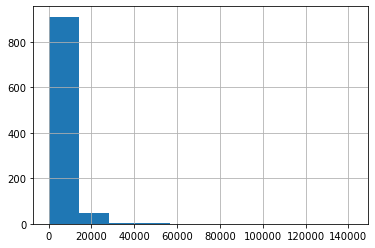

In [38]:
df.readme_length.hist()

In [39]:
df.readme_length.describe()

count       969.000000
mean       4919.704850
std        7116.134426
min          10.000000
25%        1363.000000
50%        2955.000000
75%        5946.000000
max      142109.000000
Name: readme_length, dtype: float64

<AxesSubplot:xlabel='readme_length'>

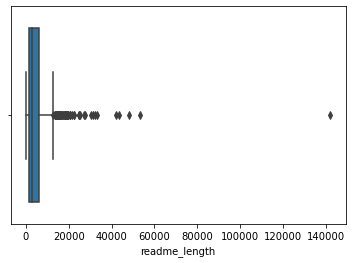

In [40]:
sns.boxplot(data=df, x='readme_length')

In [41]:
(df.readme_length > 120_000).sum()

1

In [42]:
df[df.readme_length > 120_000]

,repo,language,readme_contents,readme_length
650,google/corpuscrawler,Python,# Corpus Crawler\n\n_Corpus Crawler_ is a tool...,142109


In [44]:
df[df.readme_length > 20_000]

,repo,language,readme_contents,readme_length
40,google/glog,C++,Google Logging Library\n======================...,31458
53,google/AFL,C,# american fuzzy lop\n\n[![Build Status](https...,22596
98,google/seqio,Python,"# SeqIO: Task-based datasets, preprocessing, a...",43298
116,google/closure-stylesheets,Java,# Closure Stylesheets\n\nClosure Stylesheets i...,24805
134,google/data-layer-helper,JavaScript,# Data Layer Helper Library\nThis library prov...,25076
156,google/anthos-microk8s,HCL,![Anthos Config Management + Cloud Source Repo...,22477
181,google/stm32_bare_lib,C,# STM32 Bare Library\n\nSystem functions and e...,20784
204,google/basis_universal,C++,# Repository note\n\nThis repository is design...,24865
264,google/jax,Python,"<div align=""center"">\n<img src=""https://raw.gi...",21486
333,google/fscrypt,Go,# fscrypt [![GitHub version](https://badge.fur...,42259


In [45]:
df.repo.duplicated().value_counts()

False    969
Name: repo, dtype: int64

In [47]:
# transform into a series

string = " ".join(df.readme_contents)

string = " ".join(w.clean(string))

In [48]:
words = pd.Series(string.split())

# From the Series we can extract the value_counts, which is our raw count
# for term frequency. Once we have the raw counts, we can calculate the
# other measures.
(pd.DataFrame({'raw_count': words.value_counts()})
 .assign(frequency=lambda df: df.raw_count / df.raw_count.sum())
 .assign(augmented_frequency=lambda df: df.frequency / df.frequency.max()))

,raw_count,frequency,augmented_frequency
file,2736,0.007697,1.000000
use,2407,0.006772,0.879751
run,2074,0.005835,0.758041
google,2024,0.005694,0.739766
build,1891,0.005320,0.691155
...,...,...,...
dpf_aggregate_partial_report,1,0.000003,0.000365
versionnumberpull,1,0.000003,0.000365
vmodule,1,0.000003,0.000365
configpath_to_configpylstm,1,0.000003,0.000365


In [49]:
df['clean_content'] = df.readme_contents.apply(w.clean)

In [50]:
df.head(2)

,repo,language,readme_contents,readme_length,clean_content
0,google/ci_edit,Python,# What is ci_edit\n\nci_edit is a text editor....,8384,"[ci_edit, ci_edit, text, editor, help, view, e..."
1,google/bms-toolkit,Shell,# bms-toolkit\n\nToolkit for installing and cr...,2872,"[bmstoolkit, toolkit, installing, creating, in..."


In [51]:
def get_length(column):
    """
    This function reads the length of each readme and
    appends it to a list.
    """
    
    length = []
    for c in df.clean_content:
        text_len = len(c)
        length.append(text_len)
    
    return length

In [52]:
df['cleaned_length'] = get_length("clean_content")

In [53]:
df.head(2)

,repo,language,readme_contents,readme_length,clean_content,cleaned_length
0,google/ci_edit,Python,# What is ci_edit\n\nci_edit is a text editor....,8384,"[ci_edit, ci_edit, text, editor, help, view, e...",741
1,google/bms-toolkit,Shell,# bms-toolkit\n\nToolkit for installing and cr...,2872,"[bmstoolkit, toolkit, installing, creating, in...",189


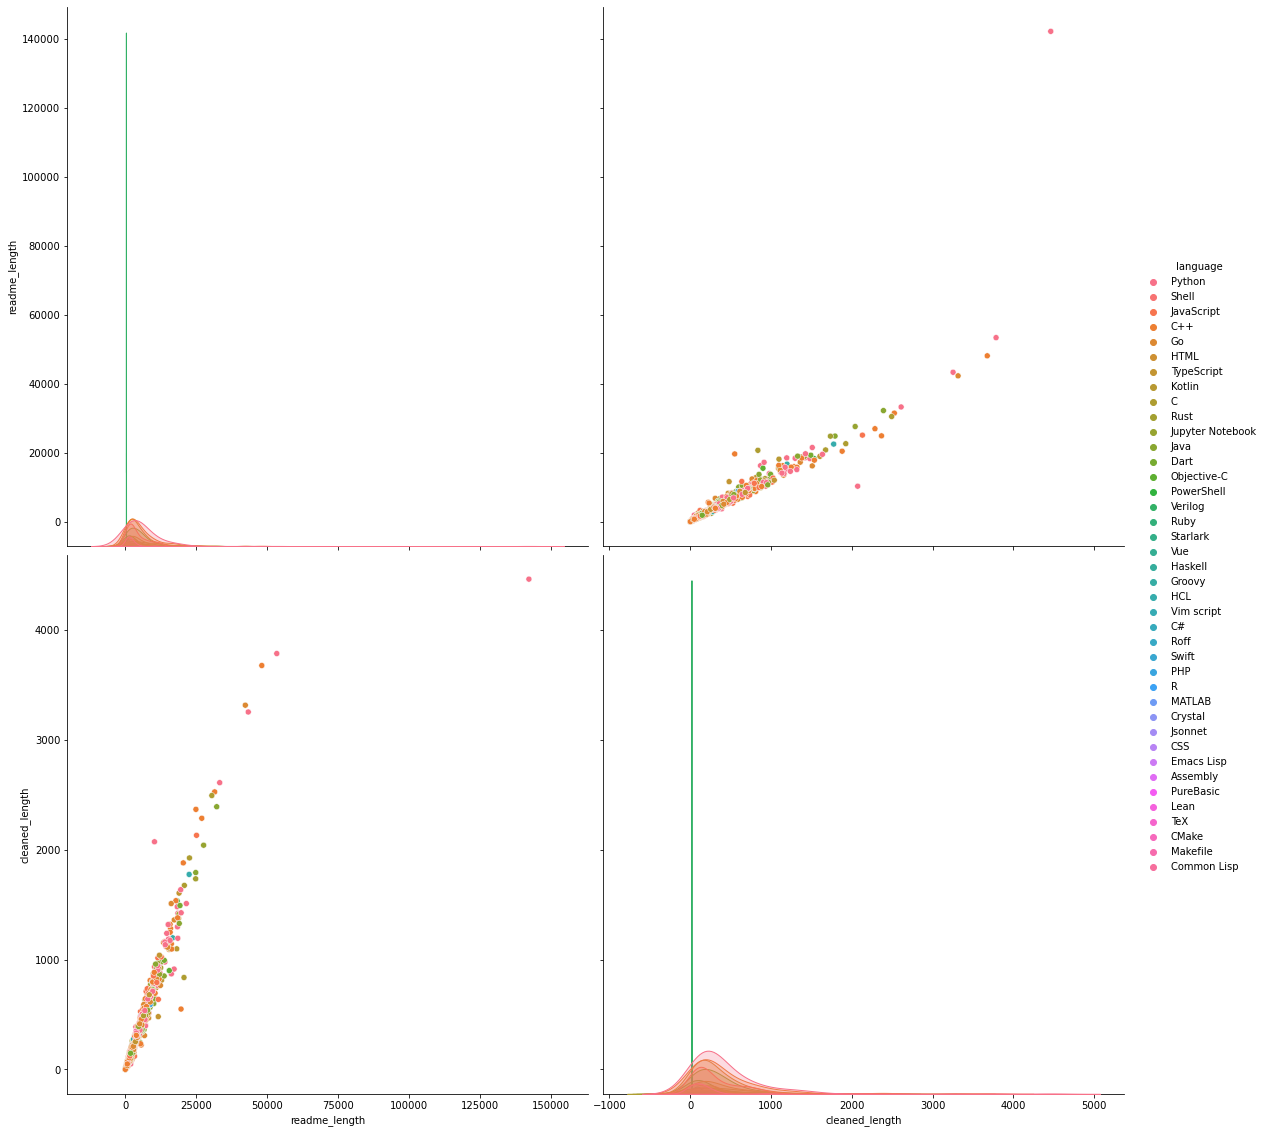

In [54]:
#fig, ax = plt.subplots(figsize=(20,20))
sns.pairplot(df, hue='language', height=8, aspect=1)